<a href="https://colab.research.google.com/github/jwjung3030/Glove/blob/master/RSI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 참고 블로그: https://jsp-dev.tistory.com/72
# Welles Wilder의 말을 따라 14일로 설정하여 계산
# RSI 시그널이라함은 RSI의 이동평균선으로 9일 이동편균선

#https://wikidocs.net/4375
#이동평균선 그리기 참고

# https://ko.wikipedia.org/wiki/RSI_(%ED%88%AC%EC%9E%90%EC%A7%80%ED%91%9C)
# Welles Wilder는 70% 이상을 초과매수 국면으로, 30% 이하를 초과매도 국면으로 규정했다.
# 따라서 RSI가 70%를 넘어서면 매도 포지션을, 30% 밑으로 떨어지면 매수 포지션을 취하는 방식이 있다.
# 다만 이 경우 대부분의 오실레이터 형 지표가 그렇듯 초과매수, 초과매도 국면에서 오래 머물며 추세가 연장되는 경우가 많아 이러한 전략만으로는 이익을 내기 힘들다는 맹점이 있다.
# 따라서 이 기법을 보완하기 위한 전략으로 RSI가 70%를 넘어선 후 머물러 있다가 다시 70%를 깨고 내려오면 매도를, RSI가 30% 밑으로 내려가 머물러 있다가 다시 30% 이상으로 올라오면 매수하는 방식으로 보완할 수 있다.

In [ ]:
pip install -q --upgrade pandas-datareader

In [ ]:
# 런타임 다시 시작 : Ctrl+M.

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime, timedelta

# start = datetime(2019, 10, 1)
# end = datetime(2019, 11, 6)

start = datetime.now() + timedelta(days=-360)
end = datetime.now()

stock_ds = web.DataReader("SPY", "yahoo", start, end)
date_index = stock_ds.index.astype("str")


def calcRSI(df, period):
    U = np.where(
        df.diff(1)["Close"] > 0, df.diff(1)["Close"], 0
    )  # df.diff를 통해 (기준일 종가 - 기준일 전일 종가)를 계산하여 0보다 크면 증가분을 감소했으면 0을 넣어줌
    D = np.where(
        df.diff(1)["Close"] < 0, df.diff(1)["Close"] * (-1), 0
    )  # df.diff를 통해 (기준일 종가 - 기준일 전일 종가)를 계산하여 0보다 작으면 감소분을 증가했으면 0을 넣어줌
    AU = pd.DataFrame(U, index=date_index).rolling(window=period).mean()  # AU, period=14일 동안의 U의 평균
    AD = pd.DataFrame(D, index=date_index).rolling(window=period).mean()  # AD, period=14일 동안의 D의 평균
    RSI = AU / (AD + AU) * 100  # 0부터 1로 표현되는 RSI에 100을 곱함
    return RSI

def getRSI(n=14):
  stock_ds.insert(
      len(stock_ds.columns), "RSI", calcRSI(stock_ds, n)
  )  # web.DataReader를 통해 받았던 원래 DataFrame에 'RSI'열을 추가
  stock_ds.insert(
      len(stock_ds.columns), "RSI signal", stock_ds["RSI"].rolling(window=9).mean()
  )  # RSI signal(RSI 이동평균)을 구해서 추가함
  
  pd.set_option('display.max_columns', 10)
  pd.set_option('display.max_rows', 100)
  print(stock_ds.tail(15))  # print로 잘 들어갔는지 출력

  return stock_ds

rsi_df = getRSI(4)


# ax = rsi_df.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2021-09-16  448.359985  444.019989  447.320007  447.170013   77786700.0   
2021-09-17  445.369995  441.019989  444.920013  441.399994  118425000.0   
2021-09-20  436.559998  428.859985  434.880005  434.040009  166445500.0   
2021-09-21  437.910004  433.070007  436.529999  433.630005   92526100.0   
2021-09-22  440.029999  433.750000  436.049988  437.859985  102350100.0   
2021-09-23  444.890015  439.600006  439.850006  443.179993   76396000.0   
2021-09-24  444.670013  441.209991  441.440002  443.910004   62094800.0   
2021-09-27  444.049988  441.899994  442.809998  442.640015   61371100.0   
2021-09-28  440.040009  432.940002  439.690002  433.720001  130436300.0   
2021-09-29  437.040009  433.850006  435.190002  434.450012   82329200.0   
2021-09-30  436.769989  428.779999  436.019989  429.140015  140181200.0   
2021-10-01  436.029999  4

In [ ]:
ma5 = rsi_df['Adj Close'].rolling(window=5).mean()
ma5.tail(10)
new_gs = rsi_df[rsi_df['Volume'] !=0]
new_gs.tail(5)
ma120 = new_gs['Adj Close'].rolling(window=120).mean()
new_gs.insert(len(new_gs.columns), "MA120", ma120)
new_gs.tail(10)

,High,Low,Open,Close,Volume,Adj Close,RSI,RSI signal,MA120
Date,,,,,,,,,
2021-09-23,444.890015,439.600006,439.850006,443.179993,76396000.0,443.179993,55.138571,29.316382,427.570812
2021-09-24,444.670013,441.209991,441.440002,443.910004,62094800.0,443.910004,96.164606,38.232269,427.907537
2021-09-27,444.049988,441.899994,442.809998,442.640015,61371100.0,442.640015,89.004413,46.717374,428.229787
2021-09-28,440.040009,432.940002,439.690002,433.720001,130436300.0,433.720001,37.253760,45.866974,428.461725
2021-09-29,437.040009,433.850006,435.190002,434.450012,82329200.0,434.450012,12.532351,40.497975,428.675155
2021-09-30,436.769989,428.779999,436.019989,429.140015,140181200.0,429.140015,4.497908,37.726138,428.843093
2021-10-01,436.029999,427.230011,430.980011,434.239990,129240100.0,434.239990,29.062748,38.606492,429.043431
2021-10-04,433.959991,426.359985,433.000000,428.640015,128570000.0,428.640015,34.826766,42.476133,429.208775
2021-10-05,435.489990,429.390015,430.239990,433.100006,90682500.0,433.100006,46.702467,45.020399,429.374691


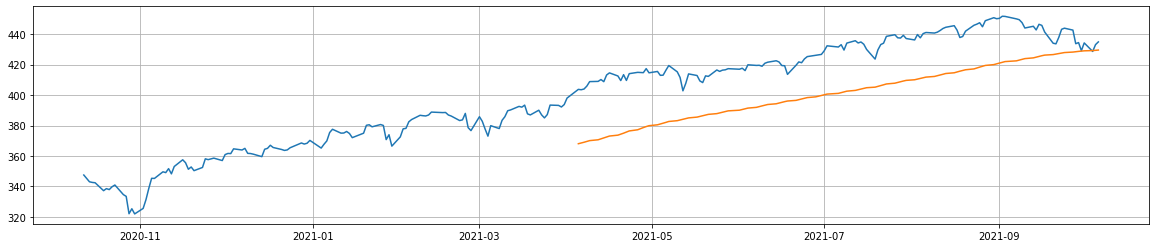

In [ ]:
plt.plot(new_gs.index, new_gs['Adj Close'], label="Adj Close")
plt.plot(new_gs.index, new_gs['MA120'], label="MA120")

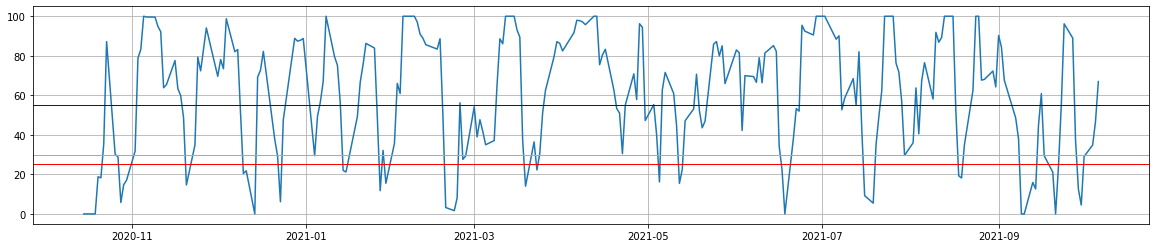

In [ ]:
# rsi_df.plot(y=['RSI'], figsize=(12, 4), legend=True, fontsize=12)
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['axes.grid'] = True 
plt.plot(rsi_df['RSI'])
plt.axhline(y=30, color='y', linewidth=1)
plt.axhline(y=25, color='r', linewidth=1)
plt.axhline(y=55, color='b', linewidth=1)